In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label kategori
kategori = ['senin', 'selasa', 'rabu', 'kamis', 'jumat', 'sabtu', 'minggu']

# Inisialisasi LabelEncoder
encoder = LabelEncoder()
encoder.fit(kategori)

# Menampilkan mapping label
print("\nLabel mapping:")
for i, item in enumerate(encoder.classes_):
    print(item, "=", i)


Label mapping:
jumat = 0
kamis = 1
minggu = 2
rabu = 3
sabtu = 4
selasa = 5
senin = 6


In [ ]:
from sklearn.model_selection import train_test_split

# Data
X_data = list(range(10))  # Ubah range ke list agar bisa digunakan dengan sklearn
y_data = list(range(10))

In [ ]:
# Random state ditentukan
print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)
    print(y_test)

print("\nrandom_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=None)
    print(y_test)

In [ ]:
pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 6.7 MB/s eta 0:00:00


In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=baa74b892a32dc0180af37d48ed79364d440b339e072be6e24b619b9e9086bb7
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
pip install pandas

In [ ]:
#import Library yg dibutuhkan

from textwrap import wrap

import emoji
import joblib
import langdetect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

In [ ]:
def get_category_dict(category_file):
        category = pd.read_json(category_file, orients="records")
        category = pd.DataFrame (category["items"].values.tolist())

        return {
        cat.id: cat.snippet.get("title")
        for cat in category.itertuples (index=False)
        }

In [ ]:
def get_category_dict(category_file):
    category = pd.read_json(category_file, orient="records")
    category = pd.DataFrame(category["items"].values.tolist())

    return {
        cat.id: cat.snippet.get("title")
        for cat in category.itertuples(index=False)
      }

In [ ]:
category_dict = get_category_dict("/content/sample_data/category.json")

In [ ]:
trending = pd.read_csv("/content/sample_data/trending.csv", parse_dates=["publish_time", "trending_time"])

with pd.option_context("display.max_columns", None):
    display(trending.head())

,video_id,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,live_status,local_title,local_description,duration,dimension,definition,caption,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time
0,NaN,2021-02-05 09:00:34+00:00,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,10,none,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",PT5M7S,2d,hd,True,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00
1,NaN,2021-02-04 15:54:08+00:00,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,none,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",PT42M30S,2d,hd,False,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00
2,NaN,2021-02-06 03:00:22+00:00,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,none,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,PT46M43S,2d,hd,False,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00
3,NaN,2021-02-05 20:26:08+00:00,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,20,none,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,PT45M59S,2d,hd,False,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00
4,NaN,2021-02-03 23:14:54+00:00,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,none,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",PT5M12S,2d,hd,False,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00


In [ ]:
start_date = trending.trending_time.min()
end_date = trending.trending_time.max()

print(f"{start_date = }")
print(f"{end_date = }")

start_date = '2021-02-07 05:46:51.832614+00:00'
end_date = '2023-09-01 09:16:49.916211+00:00'


In [ ]:
#Delete data dari bulan Februari - Juni

trending['trending_time'] = pd.to_datetime(trending['trending_time'], format='mixed', errors='coerce')
filtered_trending = trending[trending.trending_time.dt.month >= 7 ]

start_date = filtered_trending.trending_time.min()
end_date = filtered_trending.trending_time.max()

print(f"{start_date =}")
print(f"{end_date = }")

start_date =Timestamp('2021-07-01 06:01:25.524449+0000', tz='UTC')
end_date = Timestamp('2023-09-01 09:16:49.916211+0000', tz='UTC')


In [ ]:
num_videos = filtered_trending.shape[0]
print(f"{num_videos = }")

num_videos = 81517


In [ ]:
#Distribuat Missing Value
filtered_trending.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81517 entries, 21322 to 172346
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           49717 non-null  object             
 1   publish_time       81517 non-null  datetime64[ns, UTC]
 2   channel_id         81517 non-null  object             
 3   title              81517 non-null  object             
 4   description        78544 non-null  object             
 5   thumbnail_url      49717 non-null  object             
 6   thumbnail_width    49717 non-null  float64            
 7   thumbnail_height   49717 non-null  float64            
 8   channel_name       81517 non-null  object             
 9   tags               70149 non-null  object             
 10  category_id        81517 non-null  int64              
 11  live_status        81517 non-null  object             
 12  local_title        81517 non-null  object     

In [ ]:
#Delete video dengan description kosong

filtered_trending.dropna(subset=["description"], inplace=True)

In [ ]:
trending_by_date = filtered_trending.groupby(
  filtered_trending.trending_time.dt.date
)
num_trending_per_day = trending_by_date.trending_time.count()
print("Number of videos in trending per day:", num_trending_per_day.unique())

Number of videos in trending per day: [195 196 197 198 194 193 192 191 190 188 187 185 189 186 184 183 132 182
 181 179 176 172 155 144 149 148 141 140 131 129 145 167 163 157 156 175
 169 199 200 381]


In [ ]:
trending_duration = filtered_trending.groupby("title").agg(
    trending_duration=pd.NamedAgg(column="trending_time", aggfunc="count"),
    trending_start_date=pd.NamedAgg(column="trending_time", aggfunc="min"),
    trending_last_date=pd.NamedAgg(column="trending_time", aggfunc= "max")
).sort_values("trending_duration", ascending=False).reset_index()

trending_duration.head(10)

,title,trending_duration,trending_start_date,trending_last_date
0,Toleransi antar tetangga di Korea🇰🇷.. 🤦🏻‍♂️,37,2022-07-02 06:01:31.621606+00:00,2022-08-07 06:01:00.607651+00:00
1,"JEJE PENGHUNI STASIUN DUKUH ATAS, PERNAH CABUT...",37,2022-07-02 06:01:31.621150+00:00,2022-08-07 06:01:00.607537+00:00
2,"NEGO 1 GEROBAK SHAWARMA VIRAL DI TIKTOK, SAMPE...",36,2022-07-08 06:01:39.900318+00:00,2022-08-12 06:01:33.892049+00:00
3,OPW ARES Sudah Tamat,35,2022-07-02 06:01:31.621296+00:00,2022-08-05 06:02:43.644196+00:00
4,"Tantangin VYN Pake Franco, 1 Kali Kena Hook Da...",35,2022-07-01 06:01:38.284040+00:00,2022-08-04 06:02:04.519603+00:00
5,SINGAPORE STREET FOOD #08,35,2022-07-02 06:01:31.621620+00:00,2022-08-06 06:02:02.694750+00:00
6,Kok di Indonesia ada penjual Rawon yg lebih pi...,34,2022-07-02 06:01:31.621592+00:00,2022-08-04 06:02:04.519738+00:00
7,SELAMAT LEBARAN GUYS!!!,33,2022-07-11 06:00:59.413948+00:00,2022-08-12 06:01:33.891919+00:00
8,"HANYA FARIDA NURHAN, MUKBANG MIE GACOAN LEVEL ...",32,2022-07-11 06:00:59.414152+00:00,2022-08-11 06:01:46.801212+00:00
9,BORONG ISI KULKAS SAMA BABY SHARK!!!,32,2022-07-02 06:01:31.621266+00:00,2022-08-02 06:14:40.735514+00:00


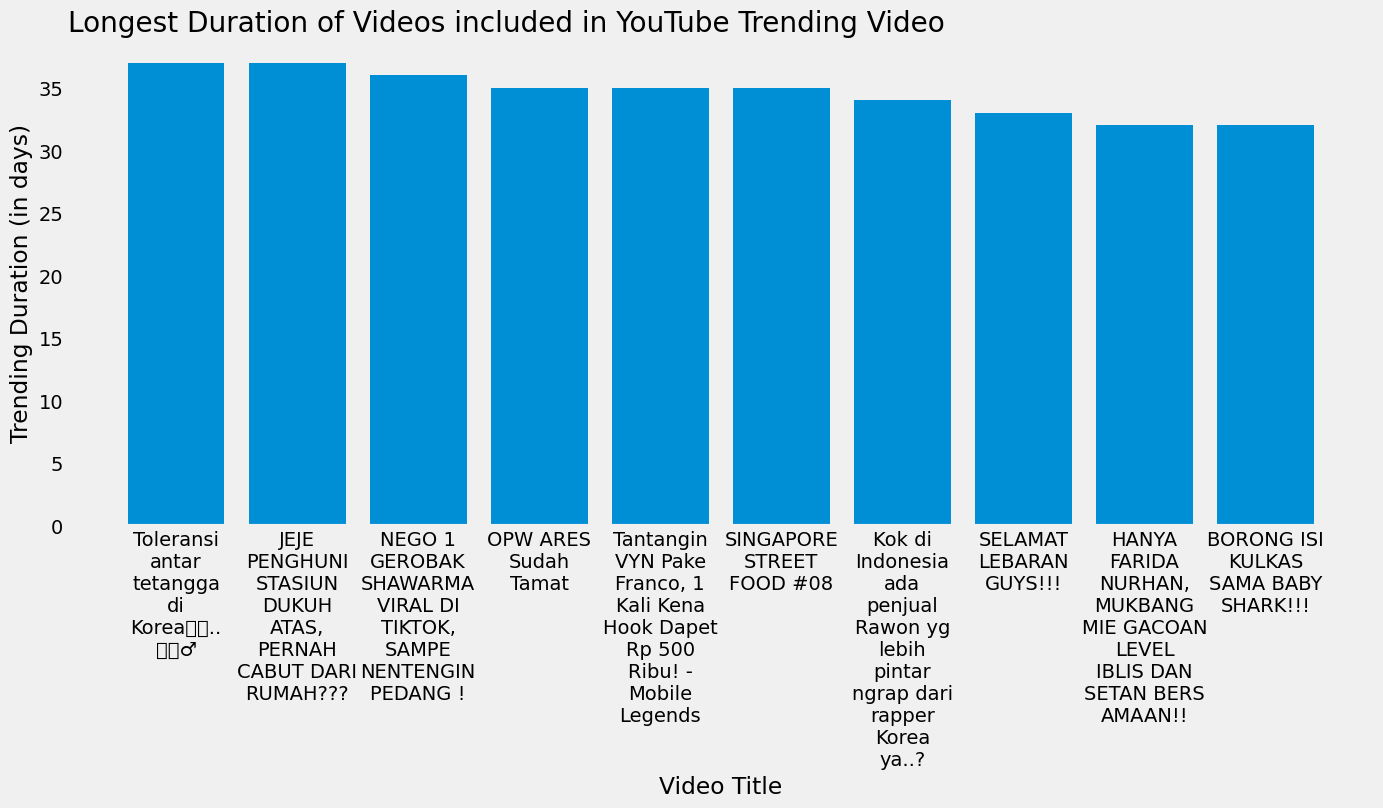

In [ ]:
#Visualisasi data trending dengan chart bar

plt.figure(figsize=(15, 6))
plt.bar(
    trending_duration.title[:10].apply(lambda title: "\n".join(wrap(title, width=10))),
    trending_duration.trending_duration[:10]
)
plt.title("Longest Duration of Videos included in YouTube Trending Video", loc="left")
plt.xlabel("Video Title")
plt.ylabel("Trending Duration (in days)")
plt.grid(False)
plt.show()

In [ ]:
trending_by_title = filtered_trending.groupby("title")

trending_rewind = trending_by_title[["view", "like", "dislike"]].agg(["min", "max", "mean", "sum"])
trending_rewind

view             \
                                                          min        max   
title                                                                      
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...   101823.0   121044.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...  2280620.0  2637486.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...    72434.0   116310.0   
"GUE JADI TAU ISI HATI WARISO SELAMA INI..."        1798947.0  2064042.0   
"Grebek rumah harris vriza, dan percintaannya d...    68879.0   163773.0   
...                                                       ...        ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   148668.0   680210.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...   330156.0  7334655.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...   278942.0  1212522.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...   320084.0  1097903.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  1423178.0  2966798.0   

                                                                              \
                                                            mean         sum   
title                                                                          
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...  1.114335e+05    222867.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...  2.459053e+06   4918106.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...  9.390625e+04    375625.0   
"GUE JADI TAU ISI HATI WARISO SELAMA INI..."        1.981122e+06  19811225.0   
"Grebek rumah harris vriza, dan percintaannya d...  1.267565e+05    760539.0   
...                                                          ...         ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...  5.519997e+05   8831995.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...  3.414214e+06  34142143.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...  7.948737e+05   5564116.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...  7.562497e+05   4537498.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  2.629831e+06  36817634.0   

                                                        like            \
                                                         min       max   
title                                                                    
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...    1336.0    1456.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...   93348.0  101207.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...     990.0    1432.0   
"GUE JADI TAU ISI HATI WARISO SELAMA INI..."         41528.0   44699.0   
"Grebek rumah harris vriza, dan percintaannya d...    5529.0    8714.0   
...                                                      ...       ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   39847.0  101922.0   
🥰 New Gadgets & Versatile Utensils For Home # 2...    2822.0   58066.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...    2790.0   10212.0   
🥰 New Gadgets & Versatile Utensils For Home # 3...    3025.0    8759.0   
🩸괴담회에 어서오세요🩸: 첫 번째 이야기 | WELCOME TO NCT’S HORRO...  316849.0  457809.0   

                                                                              \
                                                             mean        sum   
title                                                                          
"Awalnya Diserang Bertubi tubi" Lihatlah Bagaim...    1396.000000     2792.0   
"BABY R" BIKIN GEMES !!! RAFATHAR CEMBURU, SEMU...   97277.500000   194555.0   
"Emosi Rico Simanjutak" Saat Taisei Marukawa Be...    1228.500000     4914.0   
"GUE JADI TAU ISI HATI WARISO SELAMA INI..."         43795.800000   437958.0   
"Grebek rumah harris vriza, dan percintaannya d...    7486.833333    44921.0   
...                                                           ...        ...   
🥘Yuk! Kita coba in! Let’s eat | WayV’s ONE-DAY ...   87227.125000  1395634.0   
🥰 New Gadgets & Versatile Utensils

In [ ]:
import matplotlib.pyplot as plt
from textwrap import wrap

# Mengambil 10 video dengan jumlah like tertinggi
top_10_liked = trending_rewind["like"].sort_values(by="max", ascending=False).iloc[:10]

# Membuat plot
plt.figure(figsize=(15, 6))

# Bar chart untuk jumlah like terakhir
plt.bar(
    top_10_liked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_liked["max"],
    label="Last Like",
    color="royalblue"
)

# Bar chart untuk jumlah like awal
plt.bar(
    top_10_liked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_liked["min"],
    label="Start Like",
    color="lightcoral"
)

# Menambahkan judul dan label
plt.title("Most Videos in Trending List Improves Drastically in Terms of Likes", loc="left", y=1.1)
plt.xlabel("Video Title")
plt.ylabel("Number of Likes")
plt.legend()
plt.grid(False)

# Menampilkan plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from textwrap import wrap

# Pastikan trending_rewind sudah didefinisikan sebelumnya
top_10_disliked = trending_rewind["dislike"].sort_values("max", ascending=False).iloc[:10]

# Membuat plot
plt.figure(figsize=(15, 6))

# Bar chart untuk jumlah dislike terakhir (max)
plt.bar(
    top_10_disliked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=10))),
    top_10_disliked["max"],
    label="Last Dislike"
)

# Bar chart untuk jumlah dislike awal (min)
plt.bar(
    top_10_disliked.index.to_series().apply(lambda title: "\n".join(wrap(title, width=12))),
    top_10_disliked["min"],
    label="Start Dislike"
)

# Menambahkan judul dan label
plt.title("Most Disliked Videos in Trending List Are Often Shorts and Gain More Dislikes", loc="left")
plt.ylabel("Number of Dislikes")
plt.xlabel("Video Title")
plt.legend()
plt.grid(False)

# Menampilkan plot
plt.show()

In [ ]:
# Mengambil sampel 10 data dari dataset dengan seed random 11
sample = filtered_trending.sample(10, random_state=11)

# Menampilkan hanya kolom title dan description
sample[["title", "description"]]

In [ ]:
available_columns = [col for col in ["title", "title_lang", "description", "desc_lang"] if col in sample.columns]
display(sample[available_columns])

In [ ]:
with pd.option_context("display.max_colwidth", 100):
    display(sample[["title", "description"]])

In [ ]:
from langdetect import detect

# Fungsi untuk mendeteksi bahasa dari teks
def detect_language(text):
    """Detect language of the given text."""
    try:
        lang = detect(text)  # Menggunakan langdetect.detect() dengan benar
        return lang
    except:
        return None  # Mengembalikan None jika terjadi error

In [ ]:
# Menampilkan beberapa baris pertama setelah menambahkan deteksi bahasa
filtered_trending[["title", "description"]].head(10)


In [ ]:
filtered_trending["desc_lang"] = filtered_trending["description"].apply(detect_language)
filtered_trending[["description", "desc_lang"]]

In [ ]:
filtered_trending["title_lang"] = filtered_trending["title"].apply(detect_language)
filtered_trending[["title", "title_lang"]]

In [ ]:
# Memfilter video yang berbahasa Indonesia berdasarkan deteksi bahasa
indo_trending = filtered_trending.loc[
    (filtered_trending["title_lang"] == "id") | (filtered_trending["desc_lang"] == "id")
]

# Menampilkan 10 sampel acak dari data yang telah difilter
with pd.option_context("display.max_columns", None):
    display(indo_trending.sample(10))

In [ ]:
# Memfilter video yang berbahasa Indonesia berdasarkan deteksi bahasa
indo_trending = filtered_trending.loc[
    (filtered_trending["title_lang"] == "id") | (filtered_trending["desc_lang"] == "id")
]

# Menampilkan 18 sampel acak dari data yang telah difilter
with pd.option_context("display.max_columns", None):
    display(indo_trending.sample(18))

In [ ]:
import pandas as pd

# Memastikan data dalam bentuk DataFrame
data = indo_trending[["title", "description", "category_id"]].copy()

# Menghapus duplikasi berdasarkan "title"
data.drop_duplicates(subset="title", inplace=True)

# Mereset indeks agar berurutan kembali
data.reset_index(drop=True, inplace=True)

# Menampilkan ukuran dataset setelah pembersihan
print(data.shape)

In [ ]:
import emoji

def demojize(text):
    """Mengubah emoji dalam teks menjadi deskripsi teksnya."""
    for em in emoji.EMOJI_DATA:  # Loop melalui semua emoji yang dikenali
        if em in text:
            em_text = emoji.demojize(em)  # Konversi emoji ke teks
            text = text.replace(em, em_text + " ")  # Ganti emoji dengan teksnya

    return text  # Kembalikan teks yang sudah diproses

# Contoh penggunaan:
sample_text = "I love Python! 🐍🔥"
print(demojize(sample_text))

In [ ]:
data["title_emoji"] = data.title.apply(demojize)

In [ ]:
import emoji

# Buat daftar emoji yang dikenali
list_emoji = list(emoji.EMOJI_DATA.keys())

# Temukan indeks judul yang mengandung emoji
title_with_emoji_idx = [
    idx for idx in range(len(data.title))
    for em in list_emoji
    if em in data.loc[idx, "title"]
]

In [ ]:
print(title_with_emoji_idx)  # Cek apakah daftar indeks tidak kosong

In [ ]:
with pd.option_context("display.max_colwidth", 100):  # ✅ Perbaikan typo
    display(data.loc[title_with_emoji_idx])  # ✅ Pastikan title_with_emoji_idx valid

In [ ]:
# Delete kolom title
data.drop(columns="title", inplace=True)


In [ ]:
# Pastikan list_emoji sudah didefinisikan sebelumnya
desc_with_emoji_idx = [
    idx for idx in range(len(data.description))
    for em in list_emoji
    if em in data.loc[idx, "description"]
]

# Menambahkan kolom dengan deskripsi yang telah dikonversi emoji menjadi teks
data["desc_emoji"] = data.description.apply(demojize)

# Menampilkan hasil dengan emoji di deskripsi
with pd.option_context("display.max_colwidth", 108):
    display(data.loc[desc_with_emoji_idx])


In [ ]:
data.drop(columns="description", inplace=True)


In [ ]:
data["all_text"] = data["title_emoji"] + " " + data["desc_emoji"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Split data menjadi training dan development (validasi)
X_train, X_dev, y_train, y_dev = train_test_split(
    data["all_text"],
    data["category_id"],
    test_size=0.2,
    stratify=data["category_id"],
    random_state=11
)

# Cek ukuran dataset setelah split
training_size = X_train.shape[0]
dev_size = X_dev.shape[0]
print(f"Training size: {training_size}, Development size: {dev_size}")

# Definisikan TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Generate matriks TF-IDF
train_tfidf = vectorizer.fit_transform(X_train)
dev_tfidf = vectorizer.transform(X_dev)

print("Got train TF-IDF with shape:", train_tfidf.shape)
print("Got dev TF-IDF with shape:", dev_tfidf.shape)

# Konversi ke DataFrame
train_tfidf_df = pd.DataFrame(train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
dev_tfidf_df = pd.DataFrame(dev_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
with pd.option_context("display.max_columns", 108):
    display(pd.DataFrame(train_tfidf.toarray(), columns=vectorizer.get_feature_names_out()).sample(5))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Dictionary untuk berbagai model machine learning
dict_models = {
    "logistic_regression": LogisticRegression(),
    "naive_bayes": MultinomialNB(),
    "linear_svc": LinearSVC(random_state=11),
    "decision_tree": DecisionTreeClassifier(random_state=11),
    "random_forest": RandomForestClassifier(random_state=11)
}

# Cek dictionary models
print(dict_models)


In [ ]:
from sklearn.metrics import classification_report

for model in dict_models.values():
    print(f'-- {model.__class__.__name__} --')  # Perbaikan kesalahan penulisan nama kelas model

    # Latih model dengan data training
    model.fit(train_tfidf, y_train)

    # Lakukan prediksi pada data validasi
    y_pred = model.predict(dev_tfidf)

    # Cetak laporan hasil evaluasi
    print("Reports on dev set:", classification_report(y_dev, y_pred), sep="\n")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dict_models = {
    "logistic_regression": LogisticRegression(),
    "naive_bayes": MultinomialNB(),
    "svm": LinearSVC(random_state=11),  # ✅ Menambahkan SVM ke dictionary
    "decision_tree": DecisionTreeClassifier(random_state=11),
    "random_forest": RandomForestClassifier(random_state=11)
}

# Cek apakah kunci "svm" sudah benar
print(dict_models.keys())  # Pastikan "svm" ada dalam output


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Grid search untuk SVM
svm_grid_search = GridSearchCV(
    dict_models["svm"],  # ✅ Sekarang "svm" sudah ada dalam dict_models
    {'C': [16, 1, 0.1, 0.65, 0.01]},  # ✅ Perbaikan penulisan parameter
    cv=5,  # Menentukan cross-validation
    scoring='accuracy',
    n_jobs=-1
)

# Melatih model dengan Grid Search
svm_grid_search.fit(train_tfidf, y_train)

# Prediksi pada data validasi
svm_pred_dev = svm_grid_search.predict(dev_tfidf)

# Evaluasi performa model
print("Reports on train set:",
      classification_report(y_train, svm_grid_search.predict(train_tfidf)),
      sep="\n")

print("Reports on dev set:",
      classification_report(y_dev, svm_pred_dev),
      sep="\n")


In [ ]:
svm_grid_search.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Grid search untuk Random Forest
random_forest_grid_search = GridSearchCV(
    dict_models["random_forest"],  # Pastikan nama sesuai dengan dict_models
    {'n_estimators': [10, 20, 25, 50, 75, 100, 125]},  # Pastikan parameter benar
    cv=5,  # Cross-validation 5 fold
    scoring="f1_macro",  # Metode evaluasi bisa diubah sesuai kebutuhan
    n_jobs=-1  # Gunakan semua core untuk mempercepat proses
)

# Training Grid Search
random_forest_grid_search.fit(train_tfidf, y_train)

# Prediksi pada data validasi (dev set)
random_forest_pred = random_forest_grid_search.predict(dev_tfidf)

# Evaluasi performa model
print("Reports on train set:")
print(classification_report(y_train, random_forest_grid_search.predict(train_tfidf)))

print("\nReports on dev set:")
print(classification_report(y_dev, random_forest_pred))

In [ ]:
random_forest_grid_search.best_params_


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Definisi model dengan pipeline
model = Pipeline([
    ("vectorizer", TfidfVectorizer(
        min_df=0.015,
        max_df=0.7,
        ngram_range=(1, 1),
    )),
    ("model", RandomForestClassifier(
        max_depth=50,
        n_estimators=75,
        random_state=11
    ))
])

# Training model
model.fit(X_train, y_train)

# Prediksi pada data validasi (dev set)
pred = model.predict(X_dev)

# Evaluasi model
print("Reports on train set:",
      classification_report(
          y_train,
          model.predict(X_train)
      ),
      sep="\n")

print("Reports on dev set:",
      classification_report(y_dev, pred),
      sep="\n")

In [ ]:
import os
import joblib

# Tentukan path penyimpanan
save_path = "/content/modelyt.joblib"

# Pastikan direktori ada sebelum menyimpan
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Simpan model
joblib.dump(model, save_path)
print(f"Model berhasil disimpan di: {save_path}")

In [ ]:
import os

file_path = "/content/modelyt.joblib"

if os.path.exists(file_path):
    print("File ditemukan ✅")
else:
    print("File tidak ditemukan ❌, cek kembali path-nya!")


In [ ]:
import joblib

# Pastikan path sesuai dengan sistem Anda
file_path = "/content/modelyt.joblib"

# Load model
model = joblib.load(file_path)

# Dapatkan parameter model
print(model.get_params())


In [ ]:
# Melakukan prediksi pada data X_dev
preds = model.predict(X_dev)

# Menampilkan laporan klasifikasi
from sklearn.metrics import classification_report
print(classification_report(y_dev, preds))


In [ ]:
import pandas as pd

# Membuat DataFrame dengan format yang benar
df = pd.DataFrame({
    'country': ['India', 'US', 'Japan', 'US', 'Japan'],
    'age': [44, 34, 46, 35, 23],
    'salary': [72000, 65600, 98060, 45000, 34600]  # Perbaikan angka
})

# Menampilkan DataFrame
print(df)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Transformasi kolom 'country' menjadi angka
df["country"] = label_encoder.fit_transform(df["country"])

# Menampilkan DataFrame setelah encoding
print(df)


In [ ]:
# Menampilkan daftar kelas yang dikenali oleh LabelEncoder
print(label_encoder.classes_)

In [ ]:
# Membuat DataFrame dengan format yang benar
df = pd.DataFrame({
    'country': ['India', 'US', 'Japan', 'US', 'Japan'],
    'age': [44, 34, 46, 35, 23],
    'salary': [72000, 65600, 98696, 45000, 34000]  # Perbaikan angka
})

# Menampilkan DataFrame
print(df)

In [ ]:
X = df['country'].values.reshape(-1, 1)
print(X)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Pastikan X sudah dalam format numpy array 2D
X = df['country'].values.reshape(-1, 1)

# Inisialisasi OneHotEncoder
onehot_encoder = OneHotEncoder()

# Melakukan fit dan transformasi
X_encoded = onehot_encoder.fit_transform(X).toarray()

# Menampilkan hasil encoding
print(X_encoded)


In [ ]:
print(onehot_encoder.categories_)


In [ ]:
import pandas as pd

# Membuat DataFrame baru dari hasil OneHotEncoder
df_onehot = pd.DataFrame(X_encoded, columns=[str(i) for i in range(X_encoded.shape[1])])

# Menampilkan DataFrame
print(df_onehot)

In [ ]:
import pandas as pd

# Menggabungkan hasil one-hot encoding dengan DataFrame asli
df = pd.concat([df_onehot, df], axis=1)

# Menampilkan hasil
print(df)


In [ ]:
# Menghapus kolom 'country' dari DataFrame
df = df.drop(['country'], axis=1)

# Menampilkan hasil
print(df)


In [ ]:
corpus = [
    'The Industrial Revolution 4.0 is changing most of the business activities',
    'The Industrial Revolution 4.0 has five technologies that are the main points',
    'Industry 4.0 opens new challenges for companies'
]

# Menampilkan hasil
print(corpus)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
vectorizer = CountVectorizer()

# Melakukan fit dan transformasi ke corpus
vectorizer_X = vectorizer.fit_transform(corpus).todense()

# Menampilkan hasil
print(vectorizer_X)

In [ ]:
print(vectorizer.get_feature_names_out())


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# Pastikan vectorizer_X dalam bentuk array
vectorizer_X = np.asarray(vectorizer_X)

# Loop untuk menghitung jarak antara setiap pasangan dokumen
for i in range(len(vectorizer_X)):
    for j in range(i + 1, len(vectorizer_X)):
        jarak = euclidean_distances(vectorizer_X[i].reshape(1, -1), vectorizer_X[j].reshape(1, -1))
        print(f'Jarak {i+1} dan {j+1}: {jarak[0][0]}')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer dengan stop words bahasa Inggris
vectorizer = CountVectorizer(stop_words='english')

# Melakukan fit dan transformasi ke corpus
vectorizer_X = vectorizer.fit_transform(corpus).todense()

# Menampilkan hasil
print(vectorizer_X)


In [ ]:
print(vectorizer.get_feature_names_out())


In [ ]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier  # Perbaikan penulisan
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

import pickle
from pathlib import Path


In [ ]:
#import dataset
df_load = pd.read_csv("/content/churn_telco_final.csv.csv")
#Tampilkan bentuk dari dataset print(df_load. shape)
#Tanpilkan 5 data teratas print(df_load.head())
#Tanpilkan junlah I0 yang unik print(df load.customerID.nunique())

In [ ]:
# Import library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from matplotlib import pyplot as plt  # Perbaikan "fron" → "from"
import numpy as np

# Membuat figure dan axis
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])  # Menambahkan axes

ax.axis("equal")  # Memastikan pie chart berbentuk lingkaran

# Label kategori
labels = ['Yes', 'No']

# Pastikan df_load sudah didefinisikan dan memiliki kolom "Churn"
churn = df_load["Churn"].value_counts()

# Membuat pie chart
ax.pie(churn, labels=labels, autopct='%.0f%%')

# Menampilkan grafik
plt.show()


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

# Mendefinisikan fitur numerik
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Membuat subplots dengan 3 kolom untuk setiap fitur numerik
fig, ax = plt.subplots(1, 3, figsize=(15, 6))  # Perbaikan "figsizes(1s, 6)" → "figsize=(15, 6)"

# Loop untuk membuat histogram untuk setiap fitur numerik
for i, feature in enumerate(numerical_features):
    df_load[df_load["Churn"] == "No"][feature].hist(
        bins=20, color="blue", alpha=0.5, ax=ax[i], label="No"
    )
    df_load[df_load["Churn"] == "Yes"][feature].hist(
        bins=20, color="orange", alpha=0.5, ax=ax[i], label="Yes"
    )

    ax[i].set_title(feature)
    ax[i].legend()

# Menampilkan plot
plt.show()


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Menggunakan gaya visual 'darkgrid' dari seaborn
sns.set(style='darkgrid')

# Membuat figure dengan 3 baris dan 3 kolom
fig, ax = plt.subplots(3, 3, figsize=(14, 12))

# Membuat countplot untuk setiap variabel kategori dengan hue berdasarkan 'Churn'
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])

# Menyesuaikan tata letak subplot agar tidak saling tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()


In [ ]:
print(df_load.columns)

In [ ]:
cleaned_df = df_load.drop(columns=["customerID", "UpdatedAt"], errors='ignore')
print(cleaned_df.head())


In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Konversi semua kolom non-numerik menjadi numerik
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == 'object':  # Periksa apakah kolom adalah tipe string/objek
        cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

print(cleaned_df.describe())  # Tampilkan ringkasan statistik data setelah encoding


In [ ]:
from sklearn.model_selection import train_test_split

# Predictor dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.063, random_state=42)

# Print results
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape, ', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))

print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape, ', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
log_model = LogisticRegression().fit(x_train, y_train)

# Print the model
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the training set
y_train_pred = log_model.predict(x_train)

# Classification report
print("Classification Report Training Model (Logistic Regression):\n")
print(classification_report(y_train, y_train_pred))

# Confusion matrix
print("Confusion Matrix Training Model (Logistic Regression):\n")
print(confusion_matrix(y_train, y_train_pred))
